In [46]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [47]:
from konlpy.tag import Mecab 

# Read csv file

In [48]:
DATA_PATH = '../크롤링/data/kr/'
filepath = "kr_전지적 독자 시점_episode_total.csv"
df = pd.read_csv(DATA_PATH+filepath)
df = df.drop( [ 'Unnamed: 0'], axis = 1)
df.head()

,Episode,Date,Review
0,1,4일 전,전설이 시작된다
1,1,6일 전,전독시 소설은 안봤는데 이거 재밌움 웨1툰은 일단 존잼
2,1,2022-10-07 21:15,나는ㅡ유중혁이다.
3,1,2022-10-07 11:58,소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤...
4,1,2022-10-06 23:22,정주행가는중♡


In [50]:
df.tail()

,Episode,Date,Review
288315,99,2022-03-08 22:53,왔다 내 야동
288316,99,2022-03-08 22:52,가즈아!
288317,99,2022-03-08 22:52,오
288318,99,2022-03-08 22:52,선댓후감
288319,99,2022-03-08 22:52,갹


In [51]:
filename = filepath.split('.')[0]
filename

'kr_전지적 독자 시점_episode_total'

# Review를 문장단위의 리스트로 저장

In [52]:
review_list = df['Review'].values
review_list[:10]

array(['전설이 시작된다', '전독시 소설은 안봤는데 이거 재밌움 웨1툰은 일단 존잼', '나는ㅡ유중혁이다.',
       '소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요?', '정주행가는중♡',
       '전독시 웹툰 ㄹㅇㅜㅜ 소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함...하 사랑해 이번에는 너다',
       '작가님도 결말 알잖씀',
       '읽기 전****** 전독시 대댓글 보며 스포 안 당하는 법 ******\n대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고, 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다. 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다.\n\n진짜 개꿀팀이에요ㅇㅇ 이것만 기억하면 기분 안망치고 즐감할수있음\n\n단, 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당',
       '김독자못생긴설정아니엇나', '8번째 정주행 시작~!'], dtype=object)

In [53]:
del df

# Convert "Review" to string and Save as a text file

In [54]:
# 주피터 노트북 메모리 늘리기
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

document = ''.join(review_list)
print(document[:1000])

filepath = filename + '.txt'
f = open(DATA_PATH + filepath, 'w')
f.write(document)
f.close()

전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨1툰은 일단 존잼나는ㅡ유중혁이다.소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요?정주행가는중♡전독시 웹툰 ㄹㅇㅜㅜ 소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함...하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전****** 전독시 대댓글 보며 스포 안 당하는 법 ******
대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고, 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다. 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다.

진짜 개꿀팀이에요ㅇㅇ 이것만 기억하면 기분 안망치고 즐감할수있음

단, 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나8번째 정주행 시작~!3000화 넘는 소설이 몇년뒤엔 탄생할지도..ㅋㅋOOO의 화산귀환오랜만에 정주행 할 사람~~~~?재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 1.9라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜 ㅠㅠㅠ 네이버 후원기능 없나??? 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 ㅠㅠ정주행하시는분? 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임? 소설 다 읽었는데 모르겠음ㅠ정주행하는데 마지막컷 다 알것같네ㅋㅋㅋㅋㅋㅋㅋㅋ 실화냐 저거 ㅋㅋㅋ그러니까 3149편이나 연재하신다는거죠?[설화, '스포일러를 당한 자'가 이야기를 시작합니다!]멸살법작가=한수영 
은밀한 모략가=원작 유중혁
유중혁 배후성=가장오래된꿈=김독자
지금 유중혁은 3회차가 아닌 기억잃은 1864회차안녕하세요 미래에서 왔습니다. 전독시 진짜 재밌으니까 꼭 보게요~아 기대된다전지적 독자 시점이 웹툰화된지 벌써 3년이 다 되가네요.웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재

In [55]:
f = open(DATA_PATH + filepath, 'r')
document = f.read()
f.close()
print(document[:1000])

전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨1툰은 일단 존잼나는ㅡ유중혁이다.소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요?정주행가는중♡전독시 웹툰 ㄹㅇㅜㅜ 소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함...하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전****** 전독시 대댓글 보며 스포 안 당하는 법 ******
대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고, 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다. 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다.

진짜 개꿀팀이에요ㅇㅇ 이것만 기억하면 기분 안망치고 즐감할수있음

단, 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나8번째 정주행 시작~!3000화 넘는 소설이 몇년뒤엔 탄생할지도..ㅋㅋOOO의 화산귀환오랜만에 정주행 할 사람~~~~?재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 1.9라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜 ㅠㅠㅠ 네이버 후원기능 없나??? 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 ㅠㅠ정주행하시는분? 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임? 소설 다 읽었는데 모르겠음ㅠ정주행하는데 마지막컷 다 알것같네ㅋㅋㅋㅋㅋㅋㅋㅋ 실화냐 저거 ㅋㅋㅋ그러니까 3149편이나 연재하신다는거죠?[설화, '스포일러를 당한 자'가 이야기를 시작합니다!]멸살법작가=한수영 
은밀한 모략가=원작 유중혁
유중혁 배후성=가장오래된꿈=김독자
지금 유중혁은 3회차가 아닌 기억잃은 1864회차안녕하세요 미래에서 왔습니다. 전독시 진짜 재밌으니까 꼭 보게요~아 기대된다전지적 독자 시점이 웹툰화된지 벌써 3년이 다 되가네요.웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재

# 한국어 전처리

# 1. 크롤링한 데이터이므로 HTML TAG 제거

In [56]:
document1 = BeautifulSoup(document, 'html.parser').get_text() # .text
print(document1[:1000])
del document

전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨1툰은 일단 존잼나는ㅡ유중혁이다.소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요?정주행가는중♡전독시 웹툰 ㄹㅇㅜㅜ 소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함...하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전****** 전독시 대댓글 보며 스포 안 당하는 법 ******
대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고, 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다. 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다.

진짜 개꿀팀이에요ㅇㅇ 이것만 기억하면 기분 안망치고 즐감할수있음

단, 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나8번째 정주행 시작~!3000화 넘는 소설이 몇년뒤엔 탄생할지도..ㅋㅋOOO의 화산귀환오랜만에 정주행 할 사람~~~~?재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 1.9라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜 ㅠㅠㅠ 네이버 후원기능 없나??? 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 ㅠㅠ정주행하시는분? 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임? 소설 다 읽었는데 모르겠음ㅠ정주행하는데 마지막컷 다 알것같네ㅋㅋㅋㅋㅋㅋㅋㅋ 실화냐 저거 ㅋㅋㅋ그러니까 3149편이나 연재하신다는거죠?[설화, '스포일러를 당한 자'가 이야기를 시작합니다!]멸살법작가=한수영 
은밀한 모략가=원작 유중혁
유중혁 배후성=가장오래된꿈=김독자
지금 유중혁은 3회차가 아닌 기억잃은 1864회차안녕하세요 미래에서 왔습니다. 전독시 진짜 재밌으니까 꼭 보게요~아 기대된다전지적 독자 시점이 웹툰화된지 벌써 3년이 다 되가네요.웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재

# 2. 한글만 추출( 구둣점, 이모티콘 자동 제거됨)

In [57]:
hangul = re.compile('[^ ㄱ-ㅣㅣ가-힣]+')
document2 = hangul.sub('', document1)
print(document2[:1000])
del document1

전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨툰은 일단 존잼나는ㅡ유중혁이다소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요정주행가는중전독시 웹툰 ㄹㅇㅜㅜ 소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전 전독시 대댓글 보며 스포 안 당하는 법 대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다진짜 개꿀팀이에요ㅇㅇ 이것만 기억하면 기분 안망치고 즐감할수있음단 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나번째 정주행 시작화 넘는 소설이 몇년뒤엔 탄생할지도ㅋㅋ의 화산귀환오랜만에 정주행 할 사람재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜 ㅠㅠㅠ 네이버 후원기능 없나 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 ㅠㅠ정주행하시는분 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임 소설 다 읽었는데 모르겠음ㅠ정주행하는데 마지막컷 다 알것같네ㅋㅋㅋㅋㅋㅋㅋㅋ 실화냐 저거 ㅋㅋㅋ그러니까 편이나 연재하신다는거죠설화 스포일러를 당한 자가 이야기를 시작합니다멸살법작가한수영 은밀한 모략가원작 유중혁유중혁 배후성가장오래된꿈김독자지금 유중혁은 회차가 아닌 기억잃은 회차안녕하세요 미래에서 왔습니다 전독시 진짜 재밌으니까 꼭 보게요아 기대된다전지적 독자 시점이 웹툰화된지 벌써 년이 다 되가네요웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재미있던 소설이었습니다 전독시를 읽을 때 항상 울고 웃던 기억이 생각나네요지금 몇번째 정주행 중인진 모르겠지만 진짜 항상 정주행 할 때 마다 감회

# 3. ㄹㅇㅜㅜ 처럼 모음이나 자음만으로 이루어진 글자 제거

In [60]:
hangul = re.compile('[ㄱ-ㅣ]+')
document3 = hangul.sub('', document2)
print(document3[:1000])
del document2

전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨툰은 일단 존잼나는유중혁이다소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요정주행가는중전독시 웹툰  소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전 전독시 대댓글 보며 스포 안 당하는 법 대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다진짜 개꿀팀이에요 이것만 기억하면 기분 안망치고 즐감할수있음단 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나번째 정주행 시작화 넘는 소설이 몇년뒤엔 탄생할지도의 화산귀환오랜만에 정주행 할 사람재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜  네이버 후원기능 없나 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 정주행하시는분 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임 소설 다 읽었는데 모르겠음정주행하는데 마지막컷 다 알것같네 실화냐 저거 그러니까 편이나 연재하신다는거죠설화 스포일러를 당한 자가 이야기를 시작합니다멸살법작가한수영 은밀한 모략가원작 유중혁유중혁 배후성가장오래된꿈김독자지금 유중혁은 회차가 아닌 기억잃은 회차안녕하세요 미래에서 왔습니다 전독시 진짜 재밌으니까 꼭 보게요아 기대된다전지적 독자 시점이 웹툰화된지 벌써 년이 다 되가네요웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재미있던 소설이었습니다 전독시를 읽을 때 항상 울고 웃던 기억이 생각나네요지금 몇번째 정주행 중인진 모르겠지만 진짜 항상 정주행 할 때 마다 감회가 새로운것 같아요 앞으로도 항상 힘내시고 열심

# 4. 구두점 삭제

In [61]:
import unicodedata
import sys

# 구두점 문자로 이루어진 딕셔너리를 생성.
punctuation = dict.fromkeys( i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

document4 = document3.translate(punctuation)
print(document4[:1000])
del document3

전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨툰은 일단 존잼나는유중혁이다소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요정주행가는중전독시 웹툰  소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전 전독시 대댓글 보며 스포 안 당하는 법 대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다진짜 개꿀팀이에요 이것만 기억하면 기분 안망치고 즐감할수있음단 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나번째 정주행 시작화 넘는 소설이 몇년뒤엔 탄생할지도의 화산귀환오랜만에 정주행 할 사람재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜  네이버 후원기능 없나 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 정주행하시는분 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임 소설 다 읽었는데 모르겠음정주행하는데 마지막컷 다 알것같네 실화냐 저거 그러니까 편이나 연재하신다는거죠설화 스포일러를 당한 자가 이야기를 시작합니다멸살법작가한수영 은밀한 모략가원작 유중혁유중혁 배후성가장오래된꿈김독자지금 유중혁은 회차가 아닌 기억잃은 회차안녕하세요 미래에서 왔습니다 전독시 진짜 재밌으니까 꼭 보게요아 기대된다전지적 독자 시점이 웹툰화된지 벌써 년이 다 되가네요웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재미있던 소설이었습니다 전독시를 읽을 때 항상 울고 웃던 기억이 생각나네요지금 몇번째 정주행 중인진 모르겠지만 진짜 항상 정주행 할 때 마다 감회가 새로운것 같아요 앞으로도 항상 힘내시고 열심

# 5. (흐어어어어어어어어어어어어어어어어어어) 반복어 삭제

In [62]:
from soynlp.normalizer import *

document5 = emoticon_normalize(document4, num_repeats=2)
print(document5[:10000])
del document4

전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨툰은 일단 존잼나는유중혁이다소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요정주행가는중전독시 웹툰 소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전 전독시 대댓글 보며 스포 안 당하는 법 대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다진짜 개꿀팀이에요 이것만 기억하면 기분 안망치고 즐감할수있음단 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나번째 정주행 시작화 넘는 소설이 몇년뒤엔 탄생할지도의 화산귀환오랜만에 정주행 할 사람재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜 네이버 후원기능 없나 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 정주행하시는분 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임 소설 다 읽었는데 모르겠음정주행하는데 마지막컷 다 알것같네 실화냐 저거 그러니까 편이나 연재하신다는거죠설화 스포일러를 당한 자가 이야기를 시작합니다멸살법작가한수영 은밀한 모략가원작 유중혁유중혁 배후성가장오래된꿈김독자지금 유중혁은 회차가 아닌 기억잃은 회차안녕하세요 미래에서 왔습니다 전독시 진짜 재밌으니까 꼭 보게요아 기대된다전지적 독자 시점이 웹툰화된지 벌써 년이 다 되가네요웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재미있던 소설이었습니다 전독시를 읽을 때 항상 울고 웃던 기억이 생각나네요지금 몇번째 정주행 중인진 모르겠지만 진짜 항상 정주행 할 때 마다 감회가 새로운것 같아요 앞으로도 항상 힘내시고 열심히 

In [63]:
DATA_PATH = '../크롤링/data/kr/'
filepath = 'document5.txt'
f = open(DATA_PATH + filepath, 'w')
f.write(document5)
f.close()

In [64]:
DATA_PATH = '../크롤링/data/kr/'
filepath = 'document5.txt'
f = open(DATA_PATH + filepath, 'r')
document5 = f.read()
f.close()
document5[:1000]

'전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨툰은 일단 존잼나는유중혁이다소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요정주행가는중전독시 웹툰 소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전 전독시 대댓글 보며 스포 안 당하는 법 대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다진짜 개꿀팀이에요 이것만 기억하면 기분 안망치고 즐감할수있음단 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나번째 정주행 시작화 넘는 소설이 몇년뒤엔 탄생할지도의 화산귀환오랜만에 정주행 할 사람재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜 네이버 후원기능 없나 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 정주행하시는분 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임 소설 다 읽었는데 모르겠음정주행하는데 마지막컷 다 알것같네 실화냐 저거 그러니까 편이나 연재하신다는거죠설화 스포일러를 당한 자가 이야기를 시작합니다멸살법작가한수영 은밀한 모략가원작 유중혁유중혁 배후성가장오래된꿈김독자지금 유중혁은 회차가 아닌 기억잃은 회차안녕하세요 미래에서 왔습니다 전독시 진짜 재밌으니까 꼭 보게요아 기대된다전지적 독자 시점이 웹툰화된지 벌써 년이 다 되가네요웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재미있던 소설이었습니다 전독시를 읽을 때 항상 울고 웃던 기억이 생각나네요지금 몇번째 정주행 중인진 모르겠지만 진짜 항상 정주행 할 때 마다 감회가 새로운것 같아요 앞으로도 항상 힘내시고 열심히

# Mecab 설치

In [ ]:
"""
https://doitgrow.com/m/39
https://wonhwa.tistory.com/m/49

conda create --name nlp python=3.7 anaconda

conda activate nlp

# Jpype 프로그램을 자동 설치
pip install konlpy

pip install tweepy==3.10.0

주피터 노트북에 가상환경 등록하기
pip install ipykernel

python -m ipykernel install --user --name nlp --display-name "nlp"

jupyter notebook

new file -> nlp
"""

In [ ]:
"""
https://iostream.tistory.com/m/144
한국어 형태소 분석기 성능 비교
연산 속도가 중요하다면 mecab을 최우선으로 고려해야하며, 심지어 분석 품질도 상위권으로 보여짐

https://vhrehfdl.tistory.com/m/147
python 3.8 버전에서는 현재 지원을 하지 않는다. 그래서 부득이하게 python 3.7 버전으로 downgrade 한 후 작동시켰다.


https://uwgdqo.tistory.com/m/363
Mecab 설치방법

https://velog.io/@kjyeon1101/%ED%8A%B8%EC%9C%84%ED%84%B0-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EC%A0%95%EC%A0%9C%ED%95%98%EA%B3%A0-%EC%BB%A4%EC%8A%A4%ED%85%80-%EC%82%AC%EC%A0%84-%EB%93%B1%EB%A1%9D%ED%95%B4%EC%84%9C-%ED%98%95%ED%83%9C%EC%86%8C%EB%A1%9C-%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0
eunjeon Mecab 설치방법

https://joyhong.tistory.com/129
_Mecab.py 오류 수정

"""

In [ ]:
# pip install -v python-mecab-ko

"""
https://christinarok.github.io/2021/04/08/mecab.html


https://velog.io/@jyong0719/konlpy-mecab-%EC%84%A4%EC%B9%98-window

mecab-python
git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
cd mecab-python-0.996/
python3 setup.py build
python3 setup.py install

pip install -v python-mecab-ko

pip install  JPype1‑0.7.5‑cp38‑cp37‑win_amd64.whl
"""


In [ ]:
# Mecab 예제

In [ ]:
# import MeCab

# m = MeCab.Tagger()
# out = m.parse("아빠가가방에들어가신다.")

# print(out)

In [ ]:
# Okt를 이용하여 토큰화 - 너무 느림
# from konlpy.tag import Okt
# okt = Okt()

# word_tokens = okt.morphs(document5)
# word_tokens[:100]

In [65]:
document5[:1000]

'전설이 시작된다전독시 소설은 안봤는데 이거 재밌움 웨툰은 일단 존잼나는유중혁이다소설은 완결났길래 이것도 완결 가까워지면 몰아보려고 하는데 지금 전개가 소설 몇화쯤인가요정주행가는중전독시 웹툰 소설이 좋아도 그림이 이상하면 별론데 그림체고 딱 전독시를 위해서 만들어진 듯함하 사랑해 이번에는 너다작가님도 결말 알잖씀읽기 전 전독시 대댓글 보며 스포 안 당하는 법 대댓글 창 들어온 즉시 화면 내리면서 싫어요 수를 확인하고 싫어요 수가 많은 답글은 제외하고 그 위까지만 답글을 본다 혹은 싫어요가 유독 많은 답글이 보인다면 내용은 보지 않고 차단하도록 한다진짜 개꿀팀이에요 이것만 기억하면 기분 안망치고 즐감할수있음단 베댓이 아닌 전체 댓글은 싫어요 수로 스포를 구분하기 쉽지 않으므로 안 보시기를 권장합니당김독자못생긴설정아니엇나번째 정주행 시작화 넘는 소설이 몇년뒤엔 탄생할지도의 화산귀환오랜만에 정주행 할 사람재밌겠당소설을 다 보신게 아니시라면 절대 답글이랑전체 댓글 보지마세요 스포당한거 후회중와 작화 뭐냐 대박이다평균 조회수가 라는건 주인공 말고 읽은 사람이 있다는거 아냐뿌잉뿌잉부엉부엉아진짜 네이버 후원기능 없나 진짜 후원하고 싶다 이건 무료로 봐선 안될것 같아 정주행하시는분 전독시 미루고미루고미루다가 찍먹 시작막컷 무슨 장면임 소설 다 읽었는데 모르겠음정주행하는데 마지막컷 다 알것같네 실화냐 저거 그러니까 편이나 연재하신다는거죠설화 스포일러를 당한 자가 이야기를 시작합니다멸살법작가한수영 은밀한 모략가원작 유중혁유중혁 배후성가장오래된꿈김독자지금 유중혁은 회차가 아닌 기억잃은 회차안녕하세요 미래에서 왔습니다 전독시 진짜 재밌으니까 꼭 보게요아 기대된다전지적 독자 시점이 웹툰화된지 벌써 년이 다 되가네요웹툰으로 처음 접하고 소설까지 벌써 다 정주행한 지금 전독시는 제 인생에서 가장 재미있던 소설이었습니다 전독시를 읽을 때 항상 울고 웃던 기억이 생각나네요지금 몇번째 정주행 중인진 모르겠지만 진짜 항상 정주행 할 때 마다 감회가 새로운것 같아요 앞으로도 항상 힘내시고 열심히

# 1. mecab 을 이용하여 토큰화

In [66]:
#from konlpy.tag import Mecab
from eunjeon import Mecab

mecab = Mecab()
word_tokens = mecab.morphs(document5)
print(word_tokens[:1000])

['전설', '이', '시작', '된다', '전', '독시', '소설', '은', '안', '봤', '는데', '이거', '재밌', '움', '웨', '툰', '은', '일단', '존', '잼', '나', '는', '유중', '혁', '이', '다', '소설', '은', '완결', '났', '길래', '이것', '도', '완결', '가까워', '지', '면', '몰', '아', '보', '려고', '하', '는데', '지금', '전개', '가', '소설', '몇', '화', '쯤', '인가요', '정주', '행가', '는', '중전', '독시', '웹툰', '소설', '이', '좋', '아도', '그림', '이', '이상', '하', '면', '별론데', '그림', '체고', '딱', '전', '독시', '를', '위해서', '만들', '어', '진', '듯', '함하', '사랑', '해', '이번', '에', '는', '너', '다', '작가', '님', '도', '결말', '알', '잖', '씀', '읽', '기', '전', '전독', '시', '대', '댓글', '보', '며', '스', '포', '안', '당하', '는', '법', '대', '댓글', '창', '들어온', '즉시', '화면', '내리', '면서', '싫', '어요', '수', '를', '확인', '하', '고', '싫', '어요', '수가', '많', '은', '답글', '은', '제외', '하', '고', '그', '위', '까지', '만', '답글', '을', '본다', '혹은', '싫', '어요', '가', '유독', '많', '은', '답글', '이', '보인다면', '내용', '은', '보', '지', '않', '고', '차단', '하', '도록', '한다', '진짜', '개꿀', '팀', '이', '에요', '이것', '만', '기억', '하', '면', '기분', '안', '망치', '고', '즐', '감', '할', '수', '있', '음', '단', '베', '댓', '

# 2. 한국어 불용어 만들기(list)

In [68]:
"""
한국어 불용어 리스트 : https://www.ranks.nl/stopwords/korean / https://bab2min.tistory.com/544
"""
f = open("./불용어 사전 파일/ranksnl-korean.txt", 'r')
lines = f.readlines()
lines
stop_words = []
for line in lines:
    line = line.replace('\n', '')
    stop_words.append(line)
f.close()   
    
stop_words[:10]

['같은데', '저렇게', '이야', '그냥', '같은', '인데', '이랑', '니까', '존나', '한테']

In [69]:
del document5

# 3. 정제 - 한국어 불용어 제거

In [70]:
vocab={}
sentences = []
result = []

for word in word_tokens: 
    if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
        if len(word) > 1: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
            result.append(word)
            if word not in vocab:
                vocab[word] = 0 
            vocab[word] += 1
sentences.append(result)

print(vocab)
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)


{'전설': 499, '시작': 2635, '된다': 1226, '독시': 9455, '소설': 26537, '는데': 24026, '이거': 6824, '재밌': 7877, '유중': 14399, '완결': 2295, '길래': 548, '가까워': 10, '려고': 1467, '지금': 4490, '전개': 1430, '인가요': 611, '정주': 1048, '행가': 6, '중전': 7, '웹툰': 16103, '아도': 514, '그림': 4031, '별론데': 16, '체고': 20, '만들': 1997, '함하': 14, '사랑': 6531, '작가': 14801, '결말': 1108, '전독': 1422, '댓글': 6683, '당하': 737, '들어온': 68, '화면': 231, '내리': 1227, '면서': 5369, '어요': 6294, '확인': 274, '수가': 49, '답글': 224, '제외': 122, '본다': 379, '유독': 95, '보인다면': 10, '내용': 3718, '차단': 142, '도록': 481, '한다': 1945, '진짜': 25728, '개꿀': 593, '에요': 1672, '기억': 1507, '기분': 1128, '망치': 263, '아닌': 1256, '전체': 838, '수로': 9, '구분': 143, '으므로': 21, '장합': 1, '당김': 24, '독자': 54546, '못생긴': 556, '설정': 929, '탄생': 178, '지도': 90, '화산': 53, '귀환': 74, '오랜만': 590, '주행': 829, '사람': 11597, '라면': 789, '절대': 969, '마세요': 1865, '당한': 298, '후회': 660, '작화': 2805, '대박': 1978, '평균': 95, '조회': 82, '라는': 3809, '주인공': 5029, '다는': 3402, '아냐': 574, '부엉부엉': 1, '네이버': 2187, '후원': 591, '기능':

[('독자', 54546), ('소설', 26537), ('진짜', 25728), ('는데', 24026), ('웹툰', 16103), ('작가', 14801), ('유중', 14399), ('사람', 11597), ('독시', 9455), ('생각', 9101), ('비형', 8355), ('라고', 8089), ('재밌', 7877), ('합니다', 7640), ('세요', 7422), ('성좌', 7104), ('이거', 6824), ('댓글', 6683), ('나오', 6633), ('사랑', 6531), ('수영', 6391), ('으면', 6383), ('어요', 6294), ('네요', 6189), ('생겼', 5742), ('다고', 5725), ('도깨비', 5413), ('얼굴', 5385), ('면서', 5369), ('쿠키', 5085), ('주인공', 5029), ('귀엽', 4976), ('보다', 4587), ('지금', 4490), ('해서', 4473), ('어서', 4387), ('미쳤', 4319), ('원작', 4225), ('입니다', 4113), ('그림', 4031), ('오늘', 4016), ('멸살', 3990), ('라는', 3809), ('분량', 3774), ('정도', 3771), ('은데', 3760), ('내용', 3718), ('유상', 3569), ('이렇게', 3520), ('이제', 3485), ('제발', 3475), ('다는', 3402), ('표정', 3344), ('감사', 3336), ('인가', 3301), ('장면', 3290), ('드디어', 3107), ('유승', 3100), ('나왔', 3088), ('연출', 3012), ('다가', 2988), ('소름', 2948), ('모르', 2900), ('처음', 2873), ('기대', 2866), ('아요', 2856), ('많이', 2847), ('구나', 2843), ('귀여워', 2836), ('궁금', 2834), ('이게

In [90]:
vocab_sorted

[('독자', 54546),
 ('소설', 26537),
 ('진짜', 25728),
 ('는데', 24026),
 ('웹툰', 16103),
 ('작가', 14801),
 ('유중', 14399),
 ('사람', 11597),
 ('독시', 9455),
 ('생각', 9101),
 ('비형', 8355),
 ('라고', 8089),
 ('재밌', 7877),
 ('합니다', 7640),
 ('세요', 7422),
 ('성좌', 7104),
 ('이거', 6824),
 ('댓글', 6683),
 ('나오', 6633),
 ('사랑', 6531),
 ('수영', 6391),
 ('으면', 6383),
 ('어요', 6294),
 ('네요', 6189),
 ('생겼', 5742),
 ('다고', 5725),
 ('도깨비', 5413),
 ('얼굴', 5385),
 ('면서', 5369),
 ('쿠키', 5085),
 ('주인공', 5029),
 ('귀엽', 4976),
 ('보다', 4587),
 ('지금', 4490),
 ('해서', 4473),
 ('어서', 4387),
 ('미쳤', 4319),
 ('원작', 4225),
 ('입니다', 4113),
 ('그림', 4031),
 ('오늘', 4016),
 ('멸살', 3990),
 ('라는', 3809),
 ('분량', 3774),
 ('정도', 3771),
 ('은데', 3760),
 ('내용', 3718),
 ('유상', 3569),
 ('이렇게', 3520),
 ('이제', 3485),
 ('제발', 3475),
 ('다는', 3402),
 ('표정', 3344),
 ('감사', 3336),
 ('인가', 3301),
 ('장면', 3290),
 ('드디어', 3107),
 ('유승', 3100),
 ('나왔', 3088),
 ('연출', 3012),
 ('다가', 2988),
 ('소름', 2948),
 ('모르', 2900),
 ('처음', 2873),
 ('기대', 2866),
 ('아요', 285

In [93]:
import numpy
matrix = numpy.array(vocab_sorted)
matrix[:10]

array([['독자', '54546'],
       ['소설', '26537'],
       ['진짜', '25728'],
       ['는데', '24026'],
       ['웹툰', '16103'],
       ['작가', '14801'],
       ['유중', '14399'],
       ['사람', '11597'],
       ['독시', '9455'],
       ['생각', '9101']], dtype='<U25')

In [97]:
matrix[1][0]

'소설'

In [106]:
keyword = []
for i in range(len(matrix)):
    keyword.append(matrix[i][0])
keyword[:20]

['독자',
 '소설',
 '진짜',
 '는데',
 '웹툰',
 '작가',
 '유중',
 '사람',
 '독시',
 '생각',
 '비형',
 '라고',
 '재밌',
 '합니다',
 '세요',
 '성좌',
 '이거',
 '댓글',
 '나오',
 '사랑']

# 워드클라우드 시각화

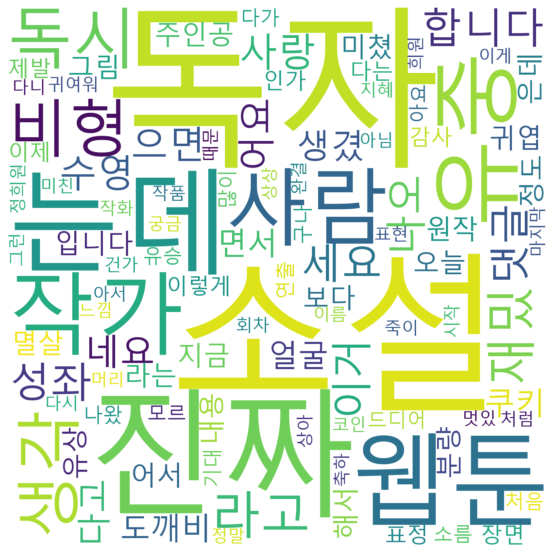

In [104]:
cnt = Counter(keyword[:100])
# 한글로 워드클라우드 시각화
from wordcloud import WordCloud
wc = WordCloud(font_path='malgun', background_color='white',     width = 800, height = 800, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(cnt)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("두 단어 이상만.png")

# data = ' '.join(list(word_to_index.keys())[:300])
# print(data)

# nltk.FreqDist를 이용한 빈도 순위

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic') # For Windows

import nltk
fd=nltk.FreqDist(result)
fd.plot(20, cumulative=False)

# eunjeon Mecab example

In [ ]:
from eunjeon import Mecab

mecab = Mecab()
mecab.pos("은전한닢 프로젝트에서 나온 mecab을 사용하는 중이다.")

In [ ]:
from eunjeon import Mecab

mecab = Mecab()
text = "싹쓰리가 이번에 싹 쓸어버리네."
a = mecab.pos(text)
print(a)
a = mecab.morphs(text)
print(a)

In [ ]:
from eunjeon import Mecab

mecab = Mecab()
mecab.pos("은전한닢 프로젝트에서 나온 mecab을 사용하는 중이다.")

In [ ]:
from eunjeon import Mecab

m = Mecab() # 사전 반영 X
text = "비타500 싹쓰리 미세먼지"
print("===================")
print(text)
print(m.pos(text))
print("===================")

In [ ]:
import MeCab
m = MeCab.Tagger()
a = m.parse("오늘은 좋은날, 행복한 삶을 누리자.")
print(a)

In [ ]:
from eunjeon import Mecab

m = Mecab(dicpath='C:/mecab/mecab-ko-dic') # 사전 반영 O
text = "비타500 싹쓰리 미세먼지"
print("===================")
print(text)
print(m.pos(text))
print("===================")

In [ ]:
from eunjeon import Mecab

mecab = Mecab(dicpath='C:/mecab/mecab-ko-dic')
text = "싹쓰리가 이번에 싹 쓸어버리네."
a = mecab.pos(text)
print(a)
a = mecab.morphs(text)
print(a)